In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')

In [3]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [4]:
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit='s')
submissions_data['date'] = pd.to_datetime(submissions_data['timestamp'], unit='s')

In [5]:
events_data['day'] = events_data['date'].dt.date
submissions_data['day'] = submissions_data['date'].dt.date

In [6]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [7]:
now = events_data['timestamp'].max()
drop_out_threshold = 30 * 24 * 60 * 60

In [8]:
users_data = events_data.groupby('user_id', as_index=False).agg(last_timestamp=('timestamp', 'max'))

In [9]:
users_data['is_gone_user'] = now - users_data['last_timestamp'] > drop_out_threshold

In [10]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [11]:
users_scores = submissions_data.pivot_table(index='user_id',
                                            columns='submission_status',
                                            values='step_id',
                                            aggfunc='count',
                                            fill_value=0).reset_index()

In [12]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [13]:
users_data = users_data.merge(users_scores, on='user_id', how='outer').fillna(0)

In [14]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [15]:
users_events_data = events_data.pivot_table(index='user_id',
                                            columns='action',
                                            values='step_id',
                                            aggfunc='count',
                                            fill_value=0).reset_index()

In [16]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [17]:
users_data_merge_1 = users_data.merge(users_events_data, on='user_id', how='outer')

In [18]:
users_data_merge_1.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [19]:
users_day = events_data.groupby('user_id')['day'].nunique().to_frame().reset_index()

In [20]:
users_day

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [21]:
users_data_merge_2 = users_data_merge_1.merge(users_day, on='user_id', how='outer').rename({'day': 'day_course'}, axis=1)

In [22]:
users_data_merge_2.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [23]:
users_data_merge_2['user_id'].nunique()

19234

In [24]:
events_data['user_id'].nunique()

19234

In [25]:
users_data_merge_2['passed_course'] = users_data_merge_2['passed'] > 170

In [26]:
users_data_merge_2.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day_course,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [27]:
users_data_merge_2.groupby('passed_course')['user_id'].count()

passed_course
False    17809
True      1425
Name: user_id, dtype: int64

In [28]:
users_data_merge_2['passed_course'].value_counts()

passed_course
False    17809
True      1425
Name: count, dtype: int64

In [29]:
users_data_merge_2['passed_course'].value_counts(normalize=True)

passed_course
False    0.925912
True     0.074088
Name: proportion, dtype: float64

In [30]:
users_data_merge_2['is_gone_user'].value_counts()

is_gone_user
True     17844
False     1390
Name: count, dtype: int64

In [31]:
users_data_merge_2['is_gone_user'].value_counts(normalize=True)

is_gone_user
True     0.927732
False    0.072268
Name: proportion, dtype: float64

In [32]:
100 * 17809 / 19234

92.59124467089529

In [33]:
100 * 1425 / 19234

7.408755329104711

In [34]:
users_data_merge_2.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day_course,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [43]:
users_data_merge_2[users_data_merge_2['passed_course']]['day_course'].median()

20.0

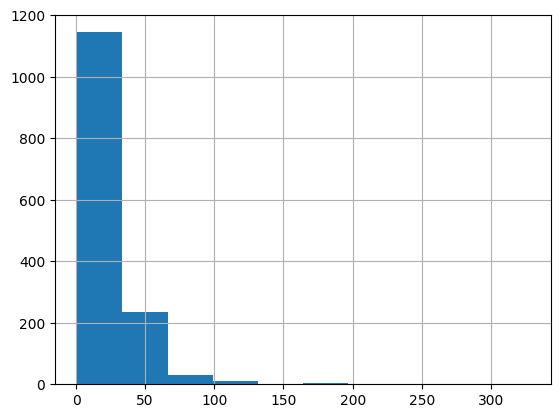

In [44]:
users_data_merge_2[users_data_merge_2['passed_course']]['day_course'].hist();

In [46]:
users_data_merge_2[users_data_merge_2['passed_course']]

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day_course,passed_course
9,16,1513162585,True,77.0,106.0,196,196,108,651,21,True
13,22,1507142631,True,76.0,47.0,198,198,89,492,32,True
18,30,1510574287,True,119.0,79.0,198,198,150,512,42,True
22,34,1525626844,False,77.0,85.0,198,195,92,1013,60,True
26,39,1502712399,True,77.0,29.0,198,198,88,1160,170,True
...,...,...,...,...,...,...,...,...,...,...,...
19190,26740,1463224362,True,71.0,45.0,193,188,96,670,18,True
19207,26763,1436216740,True,75.0,156.0,193,193,93,391,12,True
19218,26777,1436605200,True,73.0,104.0,193,191,120,422,15,True
19220,26779,1520157100,True,76.0,41.0,196,196,111,379,38,True


In [47]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [49]:
events_data.shape

(3480703, 6)

In [50]:
events_data['user_time'] = events_data['user_id'].map(str) + '_' + events_data['timestamp'].map(str)

In [51]:
events_data.shape

(3480703, 7)

In [52]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [55]:
users_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13
